<a href="https://colab.research.google.com/github/suprabhas24/Lab_1/blob/main/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
file_path = '/content/drive/MyDrive/do lab/EVEN.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

In [5]:
df.head()

,Booking_ID,Customer_ID,Destination,Travel_Dates,Booking_Date,Number_of_Travelers,Travel_Package,Payment_Method,Total_Cost,Travel_Agent,Customer_Feedback
0,BKG01438,CUST5663,BANGALORE,2024-05-27 - 2025-06-02,2023-07-26,3.0,Premium,Debit Card,41695.84,Bass Inc,Power matter brother guy. Out adult perhaps ge...
1,BKG02701,CUST4963,Vietnam,2024/05/02 / 2025/06/28,2024-02-05,3.0,Standard,Credit Card,36619.85,Wood Group,Position call within size than couple. Effect ...
2,BKG03648,cust5625,Tokyo,2023-12-02 - 2025-03-09,2024-07-17,2.0,NaN,NaN,44543.87,Bridges-Collins,NaN
3,BKG02513,CUST4246,Delhi,2023-11-10 - 2024-09-13,2024-03-15,6.0,Luxury,Credit Card,41053.94,"Edwards, Hill and Lee",NaN
4,bkg02903,CUST3901,Chennai,2023-11-09 - 2024-08-22,2023-04-09,3.0,Luxury,PayPal,36238.26,Hardy Inc,NaN


Q1. What is the average total cost of trips for each destination?

In [6]:
average_cost_by_destination = df.groupby('Destination')['Total_Cost'].mean()

average_cost_by_destination

,Total_Cost
Destination,
ALBANIA,73664.210000
ALEJANDROSHIRE,78168.730000
ARUBA,8573.290000
Adamsbury,22309.600000
Adamsfurt,15705.440000
...,...
Zacharyberg,41751.850000
Zambia,20658.930000
Zamoramouth,84404.310000


Q2. What is the distribution of payment methods used by customers?

Payment_Method
Credit Card      1088
Debit Card       1058
PayPal           1033
Bank Transfer     982
Name: count, dtype: int64


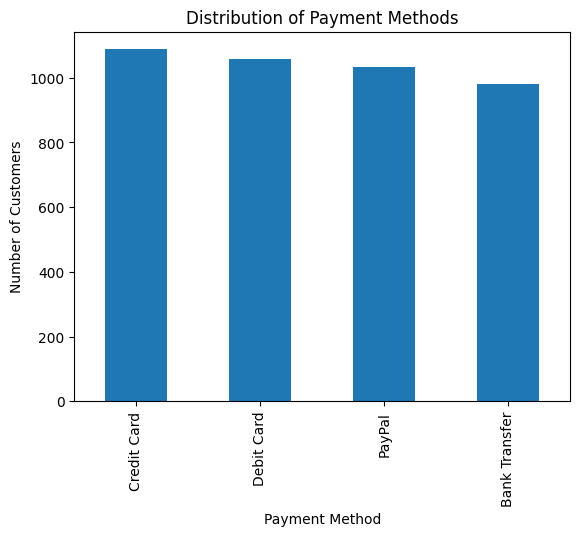

In [7]:

payment_method_counts = df['Payment_Method'].value_counts()
print(payment_method_counts)

import matplotlib.pyplot as plt
payment_method_counts.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.title('Distribution of Payment Methods')
plt.show()


Q3.How many unique destinations are present in the dataset?

In [8]:
unique_destinations = df['Destination'].nunique()
print(f"There are {unique_destinations} unique destinations in the dataset.")

There are 858 unique destinations in the dataset.



Q4. Create a new column that calculates the duration of each trip based on Travel_Dates?

In [33]:
import pandas as pd



def calculate_trip_duration(travel_dates_string):
    try:
        start_date_str, end_date_str = travel_dates_string.split(" / ")
        start_date = pd.to_datetime(start_date_str, format='%Y/%m/%d')
        end_date = pd.to_datetime(end_date_str, format='%Y/%m/%d')
        duration = (end_date - start_date).days
        return duration
    except (ValueError, AttributeError):

        return None

df['Trip_Duration'] = df['Travel_Dates'].apply(calculate_trip_duration)


In [34]:
df.head()

,Booking_ID,Customer_ID,Destination,Travel_Dates,Booking_Date,Number_of_Travelers,Travel_Package,Payment_Method,Total_Cost,Travel_Agent,Customer_Feedback,Trip_Duration
0,BKG01438,CUST5663,BANGALORE,2024-05-27 - 2025-06-02,2023-07-26,3.0,Premium,Debit Card,41695.84,Bass Inc,Power matter brother guy. Out adult perhaps ge...,NaN
1,BKG02701,CUST4963,Vietnam,2024/05/02 / 2025/06/28,2024-02-05,3.0,Standard,Credit Card,36619.85,Wood Group,Position call within size than couple. Effect ...,422.0
2,BKG03648,cust5625,Tokyo,2023-12-02 - 2025-03-09,2024-07-17,2.0,NaN,NaN,44543.87,Bridges-Collins,NaN,NaN
3,BKG02513,CUST4246,Delhi,2023-11-10 - 2024-09-13,2024-03-15,6.0,Luxury,Credit Card,41053.94,"Edwards, Hill and Lee",NaN,NaN
4,bkg02903,CUST3901,Chennai,2023-11-09 - 2024-08-22,2023-04-09,3.0,Luxury,PayPal,36238.26,Hardy Inc,NaN,NaN


Q5. Are there any missing values in important columns such as Travel_Package, Payment_Method, or Travel_Agent?

In [37]:

missing_values = df[['Travel_Package', 'Payment_Method', 'Travel_Agent']].isnull().sum()
missing_values

,0
Travel_Package,1481
Payment_Method,1089
Travel_Agent,779
